<a href="https://colab.research.google.com/github/aryadevkota/Portfolio_Projects/blob/main/StudentStressMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


In [542]:
import pandas as pd
import numpy
from pandas import Series, DataFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Read into CSV, Cleaning DataFrame(s)

In [543]:
studentlf_data = pd.read_csv('/content/student_lifestyle_dataset.csv')
studentlf_data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [544]:
# How much data are we working with?
print(len(studentlf_data))
print(len(studentlf_data.columns))


2000
8


In [545]:

# I want to predict Stress Level based on a Student's Study Hours,
# Sleep Hours, and Extracurricular Hours.
X = studentlf_data[["Study_Hours_Per_Day", "Sleep_Hours_Per_Day", "Extracurricular_Hours_Per_Day"]]
X.head()


,Study_Hours_Per_Day,Sleep_Hours_Per_Day,Extracurricular_Hours_Per_Day
0,6.9,8.7,3.8
1,5.3,8.0,3.5
2,5.1,9.2,3.9
3,6.5,7.2,2.1
4,8.1,6.5,0.6


In [546]:
y = studentlf_data["Stress_Level"]
y.head()

,Stress_Level
0,Moderate
1,Low
2,Low
3,Moderate
4,High


# Creating Model

In [547]:
tempmodel = DecisionTreeClassifier()
tempmodel.fit(X,y)

DecisionTreeClassifier()

In [548]:
# By loading my model into a file, I no longer need to recreate it. However, for
# the sake of following my process, I have left my previous steps as active
# (rather than comments).
joblib.dump(tempmodel, 'studentlf.joblib')
model = joblib.load('studentlf.joblib')

# Testing Model Out

In [549]:
#To test my model, input study hours, sleep hours, and extracurricular hours.
predictions = model.predict( [[0, 6, 9]] )
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Low'], dtype=object)

# Accuracy Testing

In [550]:
# Now, I want to delegate 20% of my data towards checking
# the accuracy of my model.
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [551]:
model.fit(X_Train,y_train)
predictiontesting = model.predict(X_Test)
score = accuracy_score(y_test,predictiontesting)
score

1.0

# Correlation Analysis

We now have an accurate model, however, we can go a further step and find which columns actually correlate.

In [552]:
# First, I'll make a copy of my dataframe.
correl_studentlfdata = studentlf_data.copy()

# I need to replace stress levels with numerical values.
stress_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
correl_studentlfdata['Stress_Level'] = correl_studentlfdata['Stress_Level'].map(stress_mapping)


correl_studentlfdata.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,1
1,2,5.3,3.5,8.0,4.2,3.0,2.75,0
2,3,5.1,3.9,9.2,1.2,4.6,2.67,0
3,4,6.5,2.1,7.2,1.7,6.5,2.88,1
4,5,8.1,0.6,6.5,2.2,6.6,3.51,2


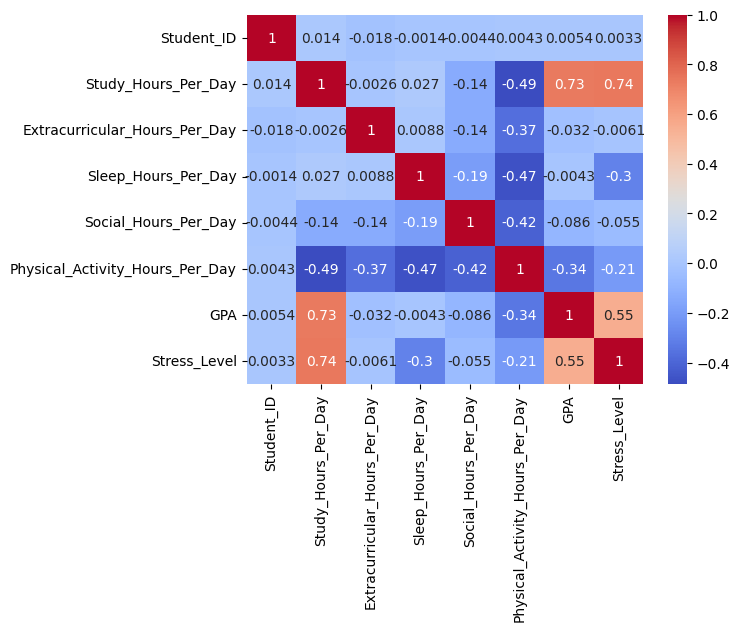

In [553]:
studentdata_correl = correl_studentlfdata.corr()
sns.heatmap(studentdata_correl, annot=True, cmap='coolwarm')
plt.show()

Here, we can see that out of all the variables we used to predict stress level, study hours per day had the most positive correlation with stress levels.

# Recreating an Accurate Model

In [554]:
# We will first recreate our binary X dataframe to be based off of factors we
# found to correlate from our matrix. %%
X2 = studentlf_data[["Study_Hours_Per_Day", "Sleep_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]]
X2.head()

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,Physical_Activity_Hours_Per_Day
0,6.9,8.7,1.8
1,5.3,8.0,3.0
2,5.1,9.2,4.6
3,6.5,7.2,6.5
4,8.1,6.5,6.6


In [555]:

revisedmodel = DecisionTreeClassifier()
#This model will be based on the factors that we found to
# significantly correlate.
revisedmodel.fit(X2,y)


DecisionTreeClassifier()

In [556]:
joblib.dump(revisedmodel, 'studentlfrevised.joblib')
revisedmodel = joblib.load('studentlfrevised.joblib')

In [561]:
#Let's try out a prediction. I am inputting study hours,
# sleep hours, and physical activity hours. %%
revisedpredictions = revisedmodel.predict( [[0, 6, 10]] )
revisedpredictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Low'], dtype=object)

In [558]:
# Now, let's double-check the accuracy of my revised model by
# allocating 20% towards testing. %%
X2_Train, X2_Test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

revisedmodel.fit(X2_Train,y_train)
predictiontesting2 = revisedmodel.predict(X2_Test)
score2 = accuracy_score(y_test,predictiontesting2)
score

1.0

# Conclusions



*   Based on my ML model, it seems that the higher the amount of study hours, and the lower the sleep hours, the more a student's stress level increases.
*   However, I noticed that extracurricular hours do not necessarily impact my model's prediction(s) on stress-level
*   This makes sense, as our correlation matrix confirms a .0061, or 0.61% correlation on extracurricular hours.
*   Once I revised and recreated my model based on the factors that correlated, I saw that an increase in physical activity hours helped to decrease stress levels at times.
*  Ultimately, the amount of sleep a student recieved most directly impacted a student's stress-levels, as no increase in physical activity nor decrease in the amount of studying could compensate for 0-5 hours of sleep.




